# Actividad 8

In [2]:
#Importamos bibliotecas
import numpy as np
from scipy.integrate import odeint, solve_ivp
import matplotlib.pyplot as plt

**Ejercicio 1**

Resuelva la ecuación diferencial del oscilador de Van der Pol:
<center>$\frac{d^2x}{dt^2}-\mu(1-x^2)\frac{dx}{dt}+x=0$</center>
donde $x$ es la posición y $\mu$ es un parámetro de la parte no lineal.
<br>Resuelva el caso para $\mu=0,1,2,3,4$ y grafique las soluciones para un tiempo de integración de $t=[0,50]$

In [29]:
#Definimos la función F(t,y) (lado derecho de la ecuacion diferencial)
#Para ello despejamos la segunda derivada d^2x/dt^2, la cual reenombramos como dvdt
#Reenombramos a dx/dt como v
def VanDerPol(y,t,mu):
        x, v = y
        dvdt = [v, mu*(1 - x**2)*v - x]
        return dvdt

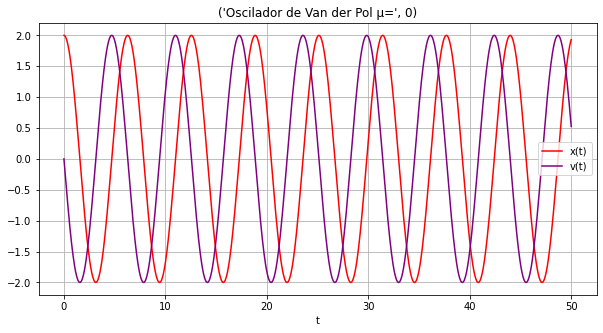

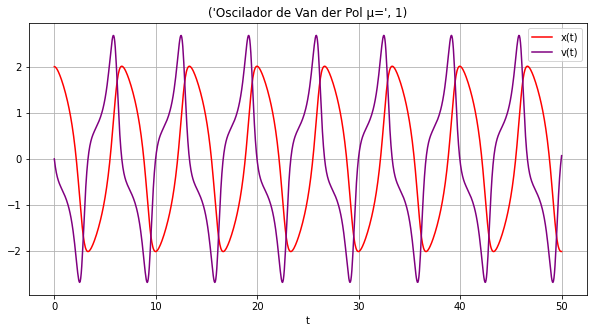

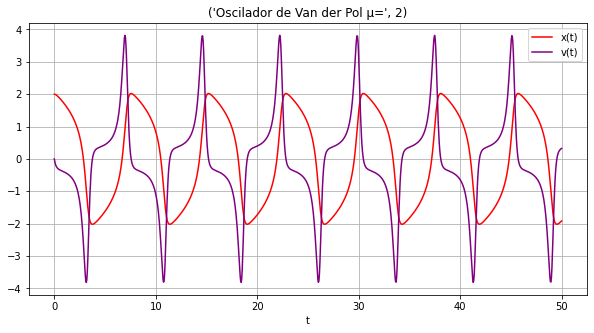

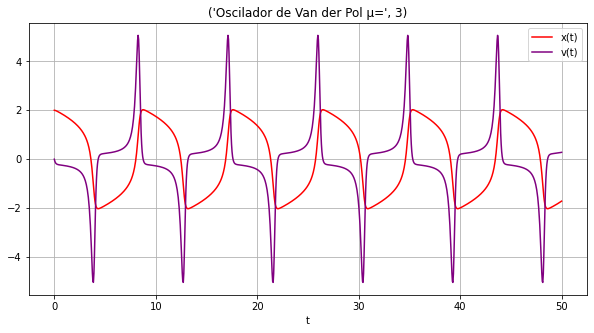

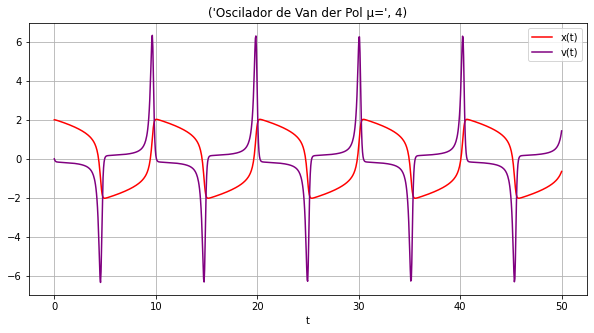

In [30]:
#Definimos los valores de mu en una lista
mu = [0,1,2,3,4]
#Definimos el tiempo de integración
t = np.linspace(0,50,1000)
#Definimos las condiciones iniciales: x=2 y v=0 (partiendo desde el reposo)
v0 = [2.0,0.0]
#Definimos los errores de tolerancia para la solución
abserr = 1.0e-10
relerr = 1.0e-8
#Realizamos las gráficas con todos los valores de mu utilizando la función odeint
for i in range(5):
  results = odeint(VanDerPol, v0, t, args=(mu[i],), atol=abserr, rtol=relerr)
  x_t = results[:,0] #Posiciones x(t)
  v_t = results[:,1] #Velocidades v(t)
  plt.figure(figsize=(10,5))
  plt.plot(t,x_t,'red', label='x(t)')
  plt.plot(t,v_t,'purple', label='v(t)')
  plt.title(('Oscilador de Van der Pol μ=', mu[i]))
  plt.legend(loc='best')
  plt.xlabel('t')
  plt.grid()
  plt.show()

**Ejercicio 2**

Siguiendo con el ejemplo anterior del oscilador de Van der Pol, reproduce la gráfica del plano fase $( \theta, \omega)$ que aparece en la Wikipedia para distintos valores de $\mu$ y se reproduce abajo.
<br><center>![picture](https://drive.google.com/uc?export=view&id=1UozqJIogFSUvB-BNqAsaF-g4G15UY5j8)</center>

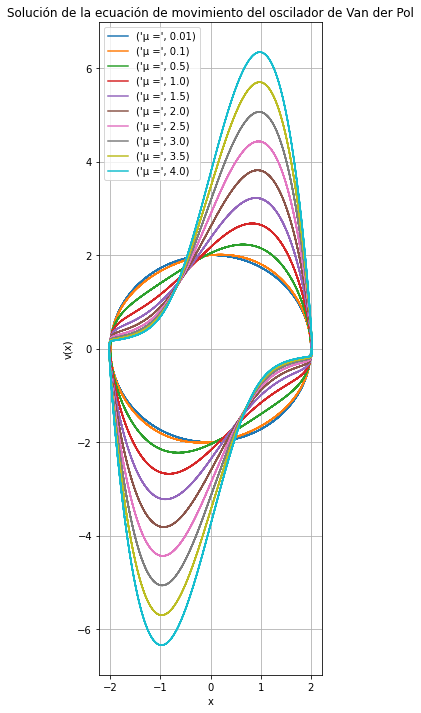

In [24]:
#Definimos el tiempo de integración
t = np.linspace(0, 50, 100000)
#Definimos los valores de mu a utilizar
mu = [0.01, 0.1, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0]
#Calculamos los valores y graficamos
plt.figure(figsize=(4, 12))
for i in range(10):
  results = odeint(VanDerPol, v0, t, args=(mu[i],), atol=abserr, rtol=relerr)
  x_t = results[:,0]
  v_t = results[:,1]
  plt.plot(x_t, v_t, label=("μ =", mu[i]))
plt.legend(loc='best')
plt.title('Solución de la ecuación de movimiento del oscilador de Van der Pol')
plt.xlabel('x')
plt.ylabel('v(x)')
plt.grid()
plt.show()

**Ejercicio 3**

Encuentre las soluciones de las siguientes Ecuaciones Diferenciales Ordinarias, utilizando los siguientes métodos:
* Método de Euler
* Método de Runge-Kutta RK4
* Función *scipy.integrate.odeint* o *scipy.integrate-solve_ivp*

**Ejercicio 3.1**

<center>$\frac{d^2x}{dt^2}+k(\frac{dx}{dt})^2-g=0, x(0)=0, \frac{dx}{dt}(0)=0, k>0$</center>

* Haciendo:<center> $v = \frac{dx}{dt}$ </center> 
* Tenemos: <center>$\frac{dv}{dt}+k(v)^2-g$</center>
* Despejando la derivada: <center>$\frac{dv}{dt}=-k(v)^2+g$</center>


In [26]:
#Definimos la función diferencial
def cl(y, t, k, g):
        x, v = y
        dvdt = [v, -k*v**2 + g]
        return dvdt

#Definimos el tiempo de integración
t = np.linspace(0, 2, 100)

#Definimos nuestras condiciones iniciales
t0 = 0.0
x0 = 0.0
v0 = 0

#Definimos los valores de nuestras constantes
k = 1
g = 9.81

*Método de Euler*

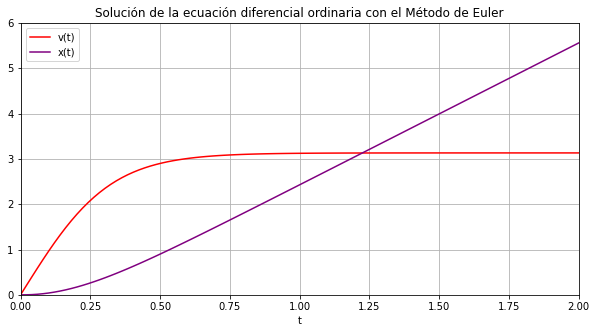

In [28]:
#Utilizamos el método de Euler
f = lambda v,t: -k*v**2 + g 

#Creamos un arreglo de ceros para las velocidades
v = np.zeros(len(t))
v[0] = v0

#Creamos un arreglo de ceros para las posiciones
x = np.zeros(len(t))
x[0] = x0
    
for n in range(0,len(t)-1):
  v[n+1] = v[n] + f(v[n],t[n])*(t[n+1] - t[n])
  x[n+1] = x[n] + v[n]*(t[n+1] - t[n])

plt.figure(figsize=(10,5))
plt.plot(t,v,'red', t,x,'purple')
plt.legend(['v(t)', 'x(t)'])
plt.title('Solución de la ecuación diferencial ordinaria con el Método de Euler')
plt.axis([0,2,0,6])
plt.grid()
plt.xlabel('t')
plt.show()

Runge-Kutta (RK4)

In [4]:
#Definimos una función para el método de Runge Kuta
def runge_kutta(f, x_0, y_0, h):
    """Four step Runge-Kutta method (RK4)
    Solves first order ODEs
    """
    k_0 = f(x_0, y_0)
    k_1 = f(x_0 + h/2, y_0 + h/2 * k_0)
    k_2 = f(x_0 + h/2, y_0 + h/2 * k_1)
    k_3 = f(x_0 + h, y_0 + h * k_2)

    k = 1/6 * (k_0 + 2.0*k_1 + 2.0*k_2 + k_3)
    x_1 = x_0 + h
    y_1 = y_0 + h * k

    return x_1, y_1

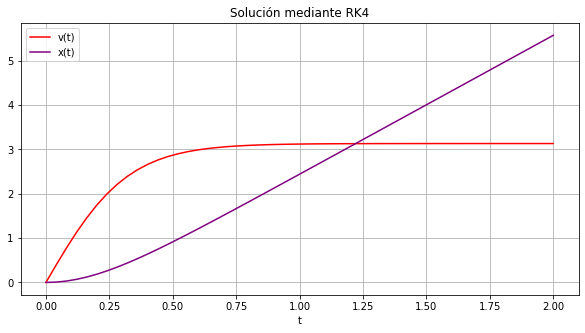

In [33]:
#Utilizamos el método de Runge-Kutta
#Calculamos h con 50 puntos
a = 0
b = 2.0 
Npts = 50
h = (b-a)/Npts

#Definimos condiciones iniciales
t0 = 0
x0 = 0
v0 = 0

#Definimos valores
k = 1
g = 9.81
t = 0
v = 0

# Resolviendo la primera ecuación:
f = lambda t,v: -k*v**2 + g 
t_values = [t0]
v_values = [v0]

for _ in range(Npts):
  t, v = runge_kutta(f, t, v, h)

  t_values.append(t)
  v_values.append(v)

#Ya que no tenemos una ecuación explícita que dependa de x y t no podemos integrar la segunda ecuación
#Tenemos algunos puntos discretos de v por lo que podemos utilizar solve_ivp para esta ecuación

#Definimos la función F de lado derecho de la ecuación.
def ED(t,y,k,g):
      dydt = [y[1], -k*(y[1])**2 + g]
      return dydt

#Definimos condiciones iniciales
t_0 = 0.0
y_0 = [x0, v0]

#Definimos el tiempo de integración de 0 a 2 segundos con 50 puntos
t = np.linspace(0,2,50)

abserr = 1.0e-8
relerr = 1.0e-6

solu = solve_ivp(lambda t, y, mu: ED(t, y, k, g),(0,2), y0=y_0, method='RK45', t_eval=t, args=(mu,), rtol=relerr, atol=abserr)
x=solu.y[0]

plt.figure(figsize=(10,5))
plt.plot(t_values,v_values,'red', label='v(t)')
plt.plot(t,x,'purple', label='x(t)')
plt.legend(loc='best')
plt.grid()
plt.title("Solución mediante RK4")
plt.xlabel('t')
plt.show()


Odeint

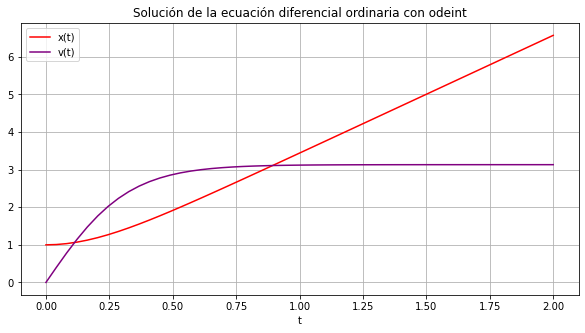

In [35]:
#Utilizando scipy.integrate.odeint

#Definimos el tiempo de integración
t = np.linspace(0,2,50)

#Definimos las condiciones iniciales 
x0 = 0.0
a0 = [1.0, 0.0]

#Integramos usando odeint
results=odeint(cl, a0, t, args=(k,g), atol=abserr, rtol=relerr)
x_t = results[:,0]
v_t = results[:,1]

plt.figure(figsize=(10,5))
plt.plot(t, x_t, 'red', label='x(t)')
plt.plot(t, v_t, 'purple', label='v(t)')
plt.legend(loc='best')
plt.title('Solución de la ecuación diferencial ordinaria con odeint')
plt.xlabel('t')
plt.grid()
plt.show()

**Ejercicio 3.2**

<center>$\frac{d^2y}{dx^2}+\frac{2}{x}\frac{dy}{dx}+y^5=0, y(0)=1, \frac{dy}{dx}(0)=0$</center>

* Haciendo: <center>$v=\frac{dy}{dx}$</center>
* Tenemos: <center>$\frac{dv}{dt}+\frac{2}{x}v+y^5=0$</center>
* Despejando: <center>$\frac{dv}{dt}=-\frac{2}{x}v-y^5$</center>

Las ecuaciones de primer orden no dependen de 2 variables, lo cual significa que no se puede utilizar el método de Euler ni Runge-Kutta.

In [52]:
#Definimos la ecuación:
#Renombramos a dv/dt como dadt
def F2(a, x):
        y, v = a
        dadx = [v, -(2/x)*v -y**5]
        return dadx

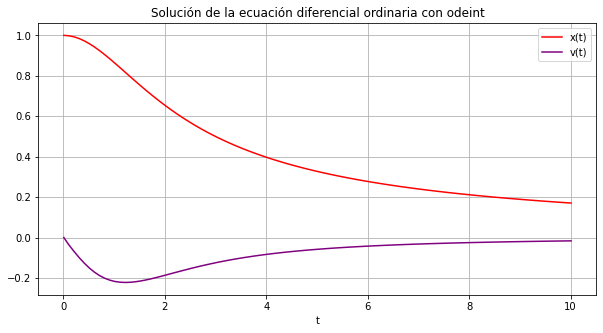

In [54]:
#Utilizamos la función scipy.integrate.odeint
#Condiciones iniciales
a0 = [1.0, 0.0]
#Definimos el intervalo de integración
t = np.linspace(0.01, 10.01, 100)
#Integramos la función
results=odeint(F2, a0, t, atol=abserr, rtol=relerr)
x_t=results[:,0]
v_t=results[:,1]
#Graficamos
plt.figure(figsize=(10,5))
plt.plot(t, x_t, 'red', label='x(t)')
plt.plot(t, v_t, 'purple', label='v(t)')
plt.legend(loc='best')
plt.title('Solución de la ecuación diferencial ordinaria con odeint')
plt.xlabel('t')
plt.grid()
plt.show()

**Ejercicio 3.3**

<center>$\frac{d^3y}{dx^3}=(x-1)^2+y^2+\frac{dy}{dx}-2, y(0)=1, y'(0)=0, y''(0)=2$</center>

* Haciendo: <center>$v=\frac{dy}{dx}$</center>
* Tenemos: <center>$\frac{dv}{dt}=(x-1)^2+y^2+v-2$</center>

Las ecuaciones no dependen de 2 variables, por lo que no ppoodemos utilizar el método de Euler ni Runge-Kutta para resolver como en el caso anterior.

In [57]:
#Definimos la ecuación diferencial
def F3(b, x):
        y, v, a = b
        dbdx = [v, a, (x-1)**2 + y**2 + v - 2]
        return dbdx

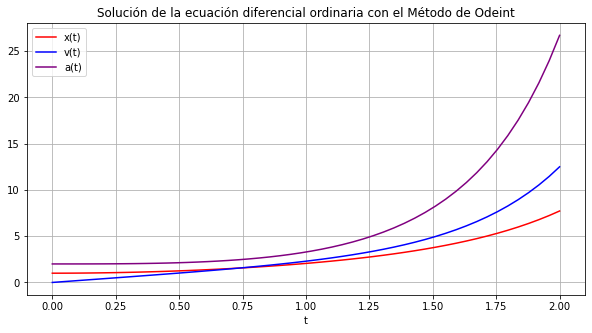

In [58]:
#Utilizando scipy.integrate.odeint
#Definimos las condiciones iniciales 
x0 = 0.0
y0 = 1.0
v0 = 0.0
a0 = 2.0
a_0 = [y0, v0, a0]
#Definimos el intervalo de integración
t = np.linspace(x0, a0, 50)
#Integramos la función
results=odeint(F3, a_0, x, atol=abserr, rtol=relerr)
x_t=results[:,0]
v_t=results[:,1]
a_t=results[:,2]

plt.figure(figsize=(10,5))
plt.plot(x, x_t, 'red', label='x(t)')
plt.plot(x, v_t, 'blue', label='v(t)')
plt.plot(x, a_t, 'purple', label='a(t)')
plt.legend(loc='best')
plt.title('Solución de la ecuación diferencial ordinaria con el Método de Odeint')
plt.xlabel('t')
plt.grid()
plt.show()